Дана таблица с данными о ежедневной выработке энергии солнечными батареями. Информация содержится в двух столбцах:

date — дата наблюдения;
cum_power — накопленная (кумулятивная) выработка энергии на указанный день.
Таким образом, перед вами классический пример временного ряда — числовой показатель, зависящий от времени. Давайте с ним поработаем.

Для начала прочитаем таблицу и выведем первые пять её строк:

In [1]:
import pandas as pd

solar_data = pd.read_csv('data/solarpower.csv')

solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [5]:
import numpy as np

В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

xi = (xi+1 + xi-1)/2

Чему равно среднее арифметическое в столбце cum_power после заполнения пропусков? Ответ округлите до целого.

In [6]:
solar_data['cum_power'] = solar_data['cum_power'].apply(lambda x: x if x != -1 else np.nan)

In [8]:
solar_data[solar_data['cum_power'].isnull()]

,date,cum_power
45,2017-02-15,NaN
647,2018-10-10,NaN


In [10]:
solar_data.iloc[44:47]

,date,cum_power
44,2017-02-14,20248.0
45,2017-02-15,NaN
46,2017-02-16,20262.0


In [11]:
solar_data.iloc[646:649]

,date,cum_power
646,2018-10-09,27986.0
647,2018-10-10,NaN
648,2018-10-11,28010.0


In [12]:
solar_data['cum_power'] = (solar_data['cum_power'].ffill() + solar_data['cum_power'].bfill())/2

In [13]:
solar_data.iloc[45]

date         2017-02-15
cum_power       20255.0
Name: 45, dtype: object

In [14]:
solar_data.iloc[647]

date         2018-10-10
cum_power       27998.0
Name: 647, dtype: object

In [17]:
round(solar_data['cum_power'].mean())

23848

Теперь, когда таблица заполнена, создайте столбец day_power — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце day_power.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [18]:
solar_data['date'] = pd.to_datetime(solar_data['date'])

In [20]:
solar_data['day_power'] = solar_data['cum_power'].diff()

In [22]:
solar_data['day_power'].fillna(value=0, inplace=True)

In [25]:
solar_data['month'] = solar_data['date'].dt.to_period('M')

In [40]:
month_power = solar_data.groupby('month', as_index=False)['day_power'].mean().round()

In [42]:
month_power[month_power['month']=='2017-03']

,month,day_power
2,2017-03,11.0


Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

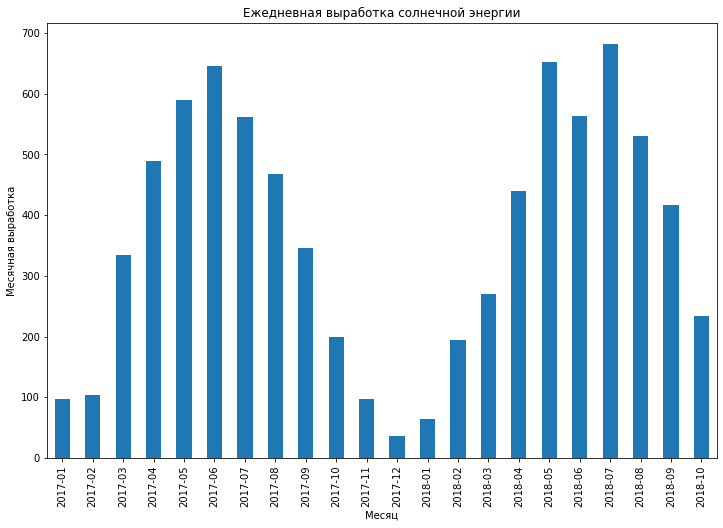

In [47]:
month_power_sum = month_power = solar_data.groupby('month', as_index=False)['day_power'].sum()

month_power_sum.plot(
    figsize=(12,8),
    x='month',
    kind='bar',
    title='Ежедневная выработка солнечной энергии',
    legend=False,
    xlabel='Месяц',
    ylabel='Месячная выработка'
);